In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
data=pd.read_csv('Table_E.csv')

In [62]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Title'])

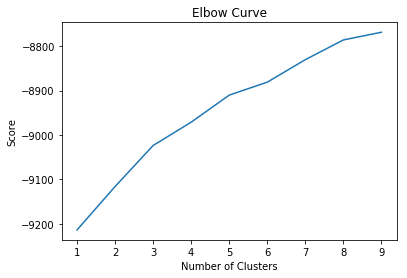

In [65]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
elbow=plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.savefig('elbow.png')

In [63]:
true_k = 10
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print("\n")
 

Top terms per cluster:
Cluster 0:
 handbook
 data
 science
 research
 sage
 analysis
 methods
 social
 oxford
 library


Cluster 1:
 science
 computer
 data
 computational
 engineering
 transactions
 applications
 social
 research
 technology


Cluster 2:
 structures
 data
 algorithms
 java
 using
 introduction
 pascal
 algorithm
 analysis
 programming


Cluster 3:
 data
 sciences
 applications
 systems
 information
 research
 methods
 computing
 social
 introduction


Cluster 4:
 2012
 international
 conference
 proceedings
 september
 revised
 selected
 papers
 information
 october


Cluster 5:
 digital
 multimedia
 hiding
 security
 age
 transactions
 forensics
 data
 language
 information


Cluster 6:
 proceedings
 international
 conference
 2013
 2017
 2015
 2011
 september
 information
 cryptology


Cluster 7:
 centered
 scale
 large
 transactions
 knowledge
 systems
 data
 issue
 special
 expert


Cluster 8:
 analysis
 data
 social
 methods
 guide
 sciences
 spss
 statistical
 u

In [31]:
label= pd.DataFrame(model.labels_.tolist(),columns=['label'])
result=pd.concat([data,label],axis=1)

In [52]:
count=result[['Source','label']].groupby(['Source', 'label']).size().reset_index(name='counts')

In [50]:
count.groupby(['label']).plot.bar(x=count['Source'],y=count['counts'])

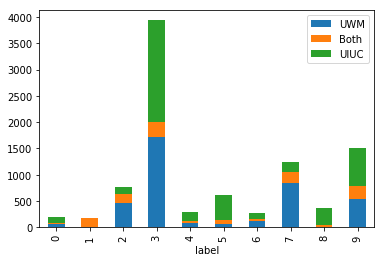

In [60]:
p=count.pivot(index='label', columns='Source', values='counts').plot.bar(stacked=True)
plt.legend(('UWM','Both','UIUC'), loc='best')
plt.savefig('result.png')